In [1]:
from IPython.display import display, Markdown
import sympy
from sympy import symbols
sympy.init_printing()

In [2]:
v_hungry, v_full = symbols('v_hungry v_full')
q_hungry_eat, q_hungry_none, q_full_eat, q_full_none = symbols('q_hungry_eat q_hungry_none q_full_eat q_full_none')
alpha, beta, gamma = symbols('alpha beta gamma')
x, y = symbols('x y')

因为 $v_{\pi}(hungry)$ 和 $v_{\pi}(none)$ 都有两个取值, 所以 $x$ 和 $y$ 分别都有两个取值

$v_{\pi}(饿)$ = $q_{\pi}(饿,吃$), $v_{\pi}(饱)$ = $q_{\pi}(饱,吃$)

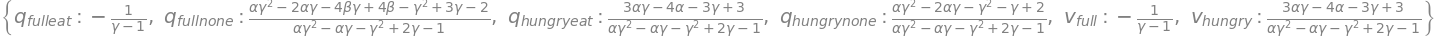

$v_{\pi}(饿)$ = $q_{\pi}(饿,不吃$), $v_{\pi}(饱)$ = $q_{\pi}(饱,不吃$)

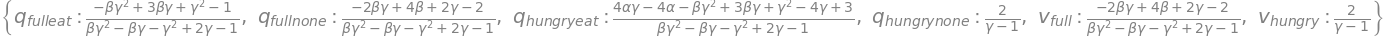

$v_{\pi}(饿)$ = $q_{\pi}(饿,不吃$), $v_{\pi}(饱)$ = $q_{\pi}(饱,吃$)

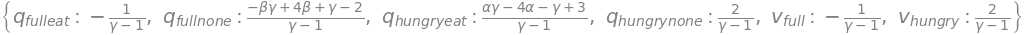

$v_{\pi}(饿)$ = $q_{\pi}(饿,吃$), $v_{\pi}(饱)$ = $q_{\pi}(饱,不吃$)

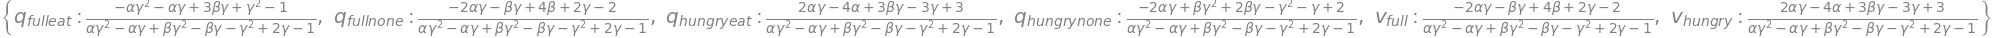

In [3]:
xy_iterator = ((1,0), (0,1), (0,0), (1,1))
for x,y in xy_iterator:
    system = sympy.Matrix((
        (1, 0, x-1, -x, 0, 0, 0),
        (0, 1, 0, 0, -y, y-1, 0),
        (-gamma, 0, 1, 0, 0, 0, -2),
        ((alpha-1)*gamma, -alpha*gamma, 0, 1, 0, 0, 4*alpha-3),
        (-beta*gamma, (beta-1)*gamma, 0, 0, 1, 0, -4*beta+2),
        (0, -gamma, 0, 0, 0, 1, 1)
    ))
    solvex = (v_hungry, v_full, q_hungry_none, q_hungry_eat, q_full_none, q_full_eat)
    result = sympy.solve_linear_system(system, *solvex)
    a = '饿,不吃' if x==0 else '饿,吃'
    b = '饱,不吃' if y==1 else '饱,吃'
    display(Markdown('$v_{\pi}(饿)$ = ' + '$q_{\pi}('+a+'$)' + ', ' + '$v_{\pi}(饱)$ = ' + '$q_{\pi}('+b+'$)'))
    display(result)